In [34]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.sans-serif'] =  ['simhei']
matplotlib.rcParams['font.serif'] =  ['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [35]:
dir_path = './data/shenzhen_results'

In [36]:
def get_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

In [37]:
shenzhen_files = get_csv_files(dir_path)
shenzhen_files

['./data/shenzhen_results/2024年04月8日-岗厦北到碧头-nvwa13.csv',
 './data/shenzhen_results/2024年08月13日-岗厦北到碧头-nvwa3.csv',
 './data/shenzhen_results/2024年08月12日-碧头到岗厦北-nvwa4.csv',
 './data/shenzhen_results/2024年08月16日-碧头到岗厦北-nvwa5.csv',
 './data/shenzhen_results/2024年03月21日-岗厦北到碧头-nvwa9.csv',
 './data/shenzhen_results/2024年06月03日-碧头到岗厦北-nvwa4.csv',
 './data/shenzhen_results/2024年05月27日-碧头到岗厦北-nvwa7.csv',
 './data/shenzhen_results/2024年04月15日-岗厦北到碧头-nvwa16.csv',
 './data/shenzhen_results/2024年04月17日-岗厦北到碧头-nvwa14.csv',
 './data/shenzhen_results/2024年04月8日-岗厦北到碧头-nvwa14.csv',
 './data/shenzhen_results/2024年03月22日-岗厦北到碧头-nvwa1.csv',
 './data/shenzhen_results/2024年03月28日-碧头到岗厦北-nvwa4.csv',
 './data/shenzhen_results/2024年05月23日-碧头到岗厦北-nvwa3.csv',
 './data/shenzhen_results/2024年03月25日-岗厦北到碧头-nvwa3.csv',
 './data/shenzhen_results/2024年05月21日-碧头到岗厦北-nvwa10.csv',
 './data/shenzhen_results/2024年05月30日-碧头到岗厦北-nvwa11.csv',
 './data/shenzhen_results/2024年03月29日-碧头到岗厦北-nvwa15.csv',
 './data/shenzhen_results/

In [38]:
target_prefix = './data/shenzhen_results/'
target_suffix = '.csv'

matching_files = [file for file in shenzhen_files if file.startswith(target_prefix) and file.endswith(target_suffix)]

print(f"找到 {len(matching_files)} 个目标文件：")
for file in matching_files:
    print(file)

找到 351 个目标文件：
./data/shenzhen_results/2024年04月8日-岗厦北到碧头-nvwa13.csv
./data/shenzhen_results/2024年08月13日-岗厦北到碧头-nvwa3.csv
./data/shenzhen_results/2024年08月12日-碧头到岗厦北-nvwa4.csv
./data/shenzhen_results/2024年08月16日-碧头到岗厦北-nvwa5.csv
./data/shenzhen_results/2024年03月21日-岗厦北到碧头-nvwa9.csv
./data/shenzhen_results/2024年06月03日-碧头到岗厦北-nvwa4.csv
./data/shenzhen_results/2024年05月27日-碧头到岗厦北-nvwa7.csv
./data/shenzhen_results/2024年04月15日-岗厦北到碧头-nvwa16.csv
./data/shenzhen_results/2024年04月17日-岗厦北到碧头-nvwa14.csv
./data/shenzhen_results/2024年04月8日-岗厦北到碧头-nvwa14.csv
./data/shenzhen_results/2024年03月22日-岗厦北到碧头-nvwa1.csv
./data/shenzhen_results/2024年03月28日-碧头到岗厦北-nvwa4.csv
./data/shenzhen_results/2024年05月23日-碧头到岗厦北-nvwa3.csv
./data/shenzhen_results/2024年03月25日-岗厦北到碧头-nvwa3.csv
./data/shenzhen_results/2024年05月21日-碧头到岗厦北-nvwa10.csv
./data/shenzhen_results/2024年05月30日-碧头到岗厦北-nvwa11.csv
./data/shenzhen_results/2024年03月29日-碧头到岗厦北-nvwa15.csv
./data/shenzhen_results/2024年04月02日-碧头到岗厦北-nvwa4.csv
./data/shenzhen_results/202

In [39]:
fig_name = 'shenzhen total'
dfs = [pd.read_csv(file) for file in matching_files]
df = pd.concat(dfs, ignore_index=True)
# df = df.iloc[::2]
df.dropna(axis=1, how='all', inplace=True)
df

/tmp/ipykernel_507217/1619443061.py:2: DtypeWarning: Columns (22,30,34) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in matching_files]
/tmp/ipykernel_507217/1619443061.py:2: DtypeWarning: Columns (1,34) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in matching_files]
/tmp/ipykernel_507217/1619443061.py:2: DtypeWarning: Columns (1,22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in matching_files]
/tmp/ipykernel_507217/1619443061.py:2: DtypeWarning: Columns (1,34) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in matching_files]


,Unnamed: 0,Machine,subway line,site name,traffic_type,time,serving cell arfcn,serving cell pci,serving cell cid,serving cell enter time,...,PDCP Throughput DL,KaDun Flag,time3,PDCP Throughput UL,锘縈achine,Serv NRarfcn,Serv SINR,Ka Dun Flag,high speed flag,if_lag
0,0,NaN,宀楀帵鍖楀埌纰уご,NaN,NaN,2024-04-08 09:35:14.961,NaN,NaN,NaN,NaN,...,5640,NaN,2024-04-08 18:04:03.005,6896,nvwa13,504990.0,68.0,-1.0,NaN,0
1,1,NaN,宀楀帵鍖楀埌纰уご,NaN,NaN,2024-04-08 18:04:03.210,NaN,NaN,NaN,NaN,...,5640,NaN,2024-04-08 18:04:03.005,6896,nvwa13,504990.0,98.0,-1.0,NaN,0
2,2,NaN,宀楀帵鍖楀埌纰уご,NaN,NaN,2024-04-08 18:04:03.621,NaN,NaN,NaN,NaN,...,87408,NaN,2024-04-08 18:04:04.025,31192,nvwa13,504990.0,100.0,-1.0,NaN,0
3,3,NaN,宀楀帵鍖楀埌纰уご,NaN,NaN,2024-04-08 18:04:04.025,NaN,NaN,NaN,NaN,...,87408,NaN,2024-04-08 18:04:04.025,31192,nvwa13,504990.0,99.0,-1.0,NaN,0
4,4,NaN,宀楀帵鍖楀埌纰уご,NaN,NaN,2024-04-08 18:04:04.441,NaN,NaN,NaN,NaN,...,87408,NaN,2024-04-08 18:04:04.025,31192,nvwa13,504990.0,100.0,-1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433571,12245,nvwa8,碧头到岗厦北,NaN,NaN,2024-04-03 09:44:14.930,504990.0,626.0,5.206833e+10,09:43:23:837 2024/04/03,...,830856,NaN,2024-04-03 09:44:14.930,9216,NaN,504990.0,67.0,-1.0,False,0
4433572,12246,nvwa8,碧头到岗厦北,NaN,NaN,2024-04-03 09:44:15.335,504990.0,626.0,5.206833e+10,09:43:23:837 2024/04/03,...,830856,NaN,2024-04-03 09:44:14.930,9216,NaN,504990.0,67.0,-1.0,False,0
4433573,12247,nvwa8,碧头到岗厦北,NaN,NaN,2024-04-03 09:44:15.740,504990.0,626.0,5.206833e+10,09:43:23:837 2024/04/03,...,1987192,NaN,2024-04-03 09:44:15.945,58496,NaN,504990.0,70.0,-1.0,False,0
4433574,12248,nvwa8,碧头到岗厦北,NaN,NaN,2024-04-03 09:44:16.152,504990.0,626.0,5.206833e+10,09:43:23:837 2024/04/03,...,1987192,NaN,2024-04-03 09:44:15.945,58496,NaN,504990.0,65.0,-1.0,False,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4433576 entries, 0 to 4433575
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unnamed: 0                       int64  
 1   Machine                          object 
 2   subway line                      object 
 3   site name                        object 
 4   traffic_type                     object 
 5   time                             object 
 6   serving cell arfcn               float64
 7   serving cell pci                 float64
 8   serving cell cid                 float64
 9   serving cell enter time          object 
 10  P_ID                             int64  
 11  ServIndex                        int64  
 12  Physical Cell ID                 int64  
 13  Serv Earfcn                      float64
 14  Serv Rsrp                        int64  
 15  Serv Rsrq                        int64  
 16  Serv RSSNR                       float64
 17  Num of B

In [41]:
df = df.drop(columns=['Unnamed: 0','锘縈achine', 'Machine','subway line','serving cell arfcn','serving cell cid','serving cell enter time','P_ID','ServIndex','Physical Cell ID','Num of Barred Cells','Valid for Meas Array','Num of Intra Cell','Is Black List Present for Intra','time2','rat','KaDun Flag','time3','Ka Dun Flag','high speed flag','if_lag','number of neighbor cell','PDCP Throughput DL','PDCP Throughput UL'])
df

,site name,traffic_type,time,serving cell pci,Serv Earfcn,Serv Rsrp,Serv Rsrq,Serv RSSNR,neighbor cell list,Serv NRarfcn,Serv SINR
0,NaN,NaN,2024-04-08 09:35:14.961,NaN,NaN,62,64,NaN,(504990-632-53-51-35-0)(504990-631-45-39-21-0),504990.0,68.0
1,NaN,NaN,2024-04-08 18:04:03.210,NaN,NaN,87,65,NaN,(627264-853-96-65-103-0)(633984-844-61-62-56-0...,504990.0,98.0
2,NaN,NaN,2024-04-08 18:04:03.621,NaN,NaN,86,65,NaN,(627264-853-96-65-103-0)(633984-844-63-61-53-0...,504990.0,100.0
3,NaN,NaN,2024-04-08 18:04:04.025,NaN,NaN,85,65,NaN,(627264-853-96-65-103-0)(633984-844-63-61-52-0...,504990.0,99.0
4,NaN,NaN,2024-04-08 18:04:04.441,NaN,NaN,85,65,NaN,(627264-853-96-65-103-0)(633984-844-64-61-52-0...,504990.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
4433571,NaN,NaN,2024-04-03 09:44:14.930,626.0,NaN,60,64,NaN,(504990-632-51-57-43-0)(504990-631-46-39-21-0),504990.0,67.0
4433572,NaN,NaN,2024-04-03 09:44:15.335,626.0,NaN,62,64,NaN,(504990-632-53-57-43-0)(504990-631-49-41-24-0)...,504990.0,67.0
4433573,NaN,NaN,2024-04-03 09:44:15.740,626.0,NaN,62,64,NaN,(504990-632-56-57-43-0)(504990-627-49-44-27-0)...,504990.0,70.0
4433574,NaN,NaN,2024-04-03 09:44:16.152,626.0,NaN,59,64,NaN,(504990-632-56-59-46-0)(504990-631-48-44-26-0)...,504990.0,65.0


In [42]:
df.loc[:, 'Serv Earfcn'] = df['Serv Earfcn'].fillna(df['Serv NRarfcn'])
df.loc[:, 'Serv RSSNR'] = df['Serv RSSNR'].fillna(df['Serv SINR'])
df = df.dropna(subset=['serving cell pci'])
df = df.drop(columns=['Serv NRarfcn','Serv SINR'])
# df = df.dropna(subset=['neighbor cell list'])
# df = df[df['Serv Rsrp'] != 97]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4333266 entries, 40 to 4433575
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   site name           object 
 1   traffic_type        object 
 2   time                object 
 3   serving cell pci    float64
 4   Serv Earfcn         float64
 5   Serv Rsrp           int64  
 6   Serv Rsrq           int64  
 7   Serv RSSNR          float64
 8   neighbor cell list  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 330.6+ MB


In [43]:
df

,site name,traffic_type,time,serving cell pci,Serv Earfcn,Serv Rsrp,Serv Rsrq,Serv RSSNR,neighbor cell list
40,NaN,NaN,2024-04-08 18:04:18.776,626.0,504990.0,85,65,99.0,(627264-853-98-65-104-0)(627264-967-69-21-3-0)...
41,NaN,NaN,2024-04-08 18:04:19.177,626.0,504990.0,84,65,100.0,(627264-853-98-65-105-0)(633984-844-61-59-48-0...
42,NaN,NaN,2024-04-08 18:04:19.779,626.0,504990.0,84,65,95.0,(627264-853-98-65-105-0)(633984-844-63-61-51-0...
43,NaN,NaN,2024-04-08 18:04:20.181,626.0,504990.0,82,65,95.0,(627264-853-98-65-105-0)(633984-844-64-61-51-0...
44,NaN,NaN,2024-04-08 18:04:20.581,626.0,504990.0,80,65,98.0,(627264-853-97-65-104-0)(627264-967-70-33-15-0...
...,...,...,...,...,...,...,...,...,...
4433571,NaN,NaN,2024-04-03 09:44:14.930,626.0,504990.0,60,64,67.0,(504990-632-51-57-43-0)(504990-631-46-39-21-0)
4433572,NaN,NaN,2024-04-03 09:44:15.335,626.0,504990.0,62,64,67.0,(504990-632-53-57-43-0)(504990-631-49-41-24-0)...
4433573,NaN,NaN,2024-04-03 09:44:15.740,626.0,504990.0,62,64,70.0,(504990-632-56-57-43-0)(504990-627-49-44-27-0)...
4433574,NaN,NaN,2024-04-03 09:44:16.152,626.0,504990.0,59,64,65.0,(504990-632-56-59-46-0)(504990-631-48-44-26-0)...


In [44]:
Serv_combine = ['Serv Earfcn','serving cell pci','Serv Rsrp','Serv Rsrq','Serv RSSNR']  
df['Serv'] = df[Serv_combine].apply(lambda row: list(row), axis=1)  
df.drop(columns=Serv_combine, inplace=True) 
df

,site name,traffic_type,time,neighbor cell list,Serv
40,NaN,NaN,2024-04-08 18:04:18.776,(627264-853-98-65-104-0)(627264-967-69-21-3-0)...,"[504990.0, 626.0, 85.0, 65.0, 99.0]"
41,NaN,NaN,2024-04-08 18:04:19.177,(627264-853-98-65-105-0)(633984-844-61-59-48-0...,"[504990.0, 626.0, 84.0, 65.0, 100.0]"
42,NaN,NaN,2024-04-08 18:04:19.779,(627264-853-98-65-105-0)(633984-844-63-61-51-0...,"[504990.0, 626.0, 84.0, 65.0, 95.0]"
43,NaN,NaN,2024-04-08 18:04:20.181,(627264-853-98-65-105-0)(633984-844-64-61-51-0...,"[504990.0, 626.0, 82.0, 65.0, 95.0]"
44,NaN,NaN,2024-04-08 18:04:20.581,(627264-853-97-65-104-0)(627264-967-70-33-15-0...,"[504990.0, 626.0, 80.0, 65.0, 98.0]"
...,...,...,...,...,...
4433571,NaN,NaN,2024-04-03 09:44:14.930,(504990-632-51-57-43-0)(504990-631-46-39-21-0),"[504990.0, 626.0, 60.0, 64.0, 67.0]"
4433572,NaN,NaN,2024-04-03 09:44:15.335,(504990-632-53-57-43-0)(504990-631-49-41-24-0)...,"[504990.0, 626.0, 62.0, 64.0, 67.0]"
4433573,NaN,NaN,2024-04-03 09:44:15.740,(504990-632-56-57-43-0)(504990-627-49-44-27-0)...,"[504990.0, 626.0, 62.0, 64.0, 70.0]"
4433574,NaN,NaN,2024-04-03 09:44:16.152,(504990-632-56-59-46-0)(504990-631-48-44-26-0)...,"[504990.0, 626.0, 59.0, 64.0, 65.0]"


In [45]:
def parse_neighbor_cell_list_to_columns(cell):
    if pd.isna(cell) or not isinstance(cell, str) or cell.strip() == '':
        return {}
    pattern = r'\((.*?)\)'
    matches = re.findall(pattern, cell)

    result = {}
    
    for idx, match in enumerate(matches[:4], start=1):
        fields = match.split('-')
        result[f'Neighbor{idx}'] = [fields[0], fields[1], fields[2], fields[3], fields[4]]
    return result


In [46]:
neighbors_expanded = df['neighbor cell list'].apply(parse_neighbor_cell_list_to_columns).apply(pd.Series)
df = pd.concat([df.drop(columns=['neighbor cell list']), neighbors_expanded], axis=1)
df

,site name,traffic_type,time,Serv,Neighbor1,Neighbor2,Neighbor3,Neighbor4
40,NaN,NaN,2024-04-08 18:04:18.776,"[504990.0, 626.0, 85.0, 65.0, 99.0]","[627264, 853, 98, 65, 104]","[627264, 967, 69, 21, 3]","[633984, 844, 62, 57, 45]","[633984, 827, 61, 58, 45]"
41,NaN,NaN,2024-04-08 18:04:19.177,"[504990.0, 626.0, 84.0, 65.0, 100.0]","[627264, 853, 98, 65, 105]","[633984, 844, 61, 59, 48]","[633984, 827, 59, 57, 43]","[633984, 823, 54, 49, 32]"
42,NaN,NaN,2024-04-08 18:04:19.779,"[504990.0, 626.0, 84.0, 65.0, 95.0]","[627264, 853, 98, 65, 105]","[633984, 844, 63, 61, 51]","[633984, 827, 60, 58, 46]","[633984, 823, 54, 47, 30]"
43,NaN,NaN,2024-04-08 18:04:20.181,"[504990.0, 626.0, 82.0, 65.0, 95.0]","[627264, 853, 98, 65, 105]","[633984, 844, 64, 61, 51]","[633984, 827, 60, 56, 43]","[633984, 843, 54, 48, 31]"
44,NaN,NaN,2024-04-08 18:04:20.581,"[504990.0, 626.0, 80.0, 65.0, 98.0]","[627264, 853, 97, 65, 104]","[627264, 967, 70, 33, 15]","[633984, 844, 64, 61, 51]","[633984, 827, 60, 56, 43]"
...,...,...,...,...,...,...,...,...
4433571,NaN,NaN,2024-04-03 09:44:14.930,"[504990.0, 626.0, 60.0, 64.0, 67.0]","[504990, 632, 51, 57, 43]","[504990, 631, 46, 39, 21]",NaN,NaN
4433572,NaN,NaN,2024-04-03 09:44:15.335,"[504990.0, 626.0, 62.0, 64.0, 67.0]","[504990, 632, 53, 57, 43]","[504990, 631, 49, 41, 24]","[504990, 627, 44, 42, 24]",NaN
4433573,NaN,NaN,2024-04-03 09:44:15.740,"[504990.0, 626.0, 62.0, 64.0, 70.0]","[504990, 632, 56, 57, 43]","[504990, 627, 49, 44, 27]","[504990, 631, 48, 39, 22]",NaN
4433574,NaN,NaN,2024-04-03 09:44:16.152,"[504990.0, 626.0, 59.0, 64.0, 65.0]","[504990, 632, 56, 59, 46]","[504990, 631, 48, 44, 26]","[504990, 627, 47, 42, 24]",NaN


In [47]:
df['Serv'] = df['Serv'].apply(lambda serv_list: [int(item) for item in serv_list])
df

,site name,traffic_type,time,Serv,Neighbor1,Neighbor2,Neighbor3,Neighbor4
40,NaN,NaN,2024-04-08 18:04:18.776,"[504990, 626, 85, 65, 99]","[627264, 853, 98, 65, 104]","[627264, 967, 69, 21, 3]","[633984, 844, 62, 57, 45]","[633984, 827, 61, 58, 45]"
41,NaN,NaN,2024-04-08 18:04:19.177,"[504990, 626, 84, 65, 100]","[627264, 853, 98, 65, 105]","[633984, 844, 61, 59, 48]","[633984, 827, 59, 57, 43]","[633984, 823, 54, 49, 32]"
42,NaN,NaN,2024-04-08 18:04:19.779,"[504990, 626, 84, 65, 95]","[627264, 853, 98, 65, 105]","[633984, 844, 63, 61, 51]","[633984, 827, 60, 58, 46]","[633984, 823, 54, 47, 30]"
43,NaN,NaN,2024-04-08 18:04:20.181,"[504990, 626, 82, 65, 95]","[627264, 853, 98, 65, 105]","[633984, 844, 64, 61, 51]","[633984, 827, 60, 56, 43]","[633984, 843, 54, 48, 31]"
44,NaN,NaN,2024-04-08 18:04:20.581,"[504990, 626, 80, 65, 98]","[627264, 853, 97, 65, 104]","[627264, 967, 70, 33, 15]","[633984, 844, 64, 61, 51]","[633984, 827, 60, 56, 43]"
...,...,...,...,...,...,...,...,...
4433571,NaN,NaN,2024-04-03 09:44:14.930,"[504990, 626, 60, 64, 67]","[504990, 632, 51, 57, 43]","[504990, 631, 46, 39, 21]",NaN,NaN
4433572,NaN,NaN,2024-04-03 09:44:15.335,"[504990, 626, 62, 64, 67]","[504990, 632, 53, 57, 43]","[504990, 631, 49, 41, 24]","[504990, 627, 44, 42, 24]",NaN
4433573,NaN,NaN,2024-04-03 09:44:15.740,"[504990, 626, 62, 64, 70]","[504990, 632, 56, 57, 43]","[504990, 627, 49, 44, 27]","[504990, 631, 48, 39, 22]",NaN
4433574,NaN,NaN,2024-04-03 09:44:16.152,"[504990, 626, 59, 64, 65]","[504990, 632, 56, 59, 46]","[504990, 631, 48, 44, 26]","[504990, 627, 47, 42, 24]",NaN


findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not foun

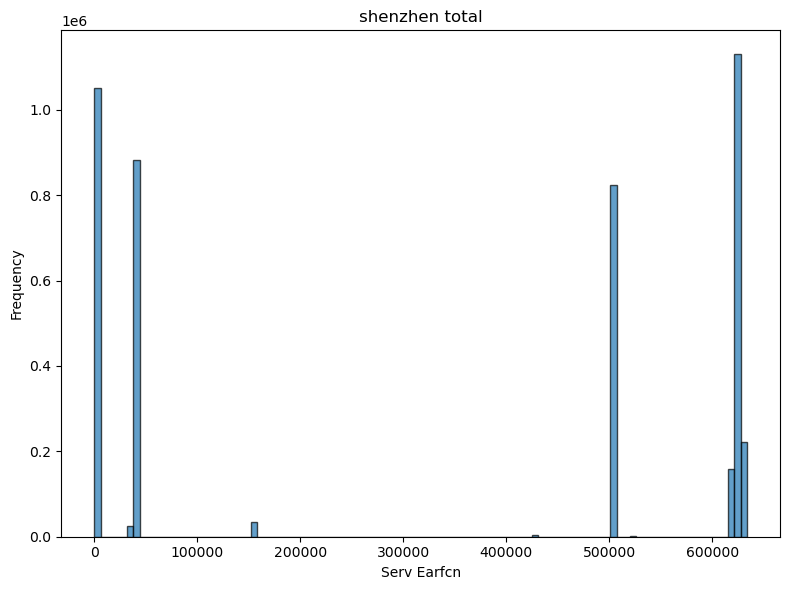

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(df['Serv'].str[0].dropna(), bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Serv Earfcn')
plt.xlabel('Serv Earfcn')
plt.ylabel('Frequency')
plt.title(fig_name)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not foun

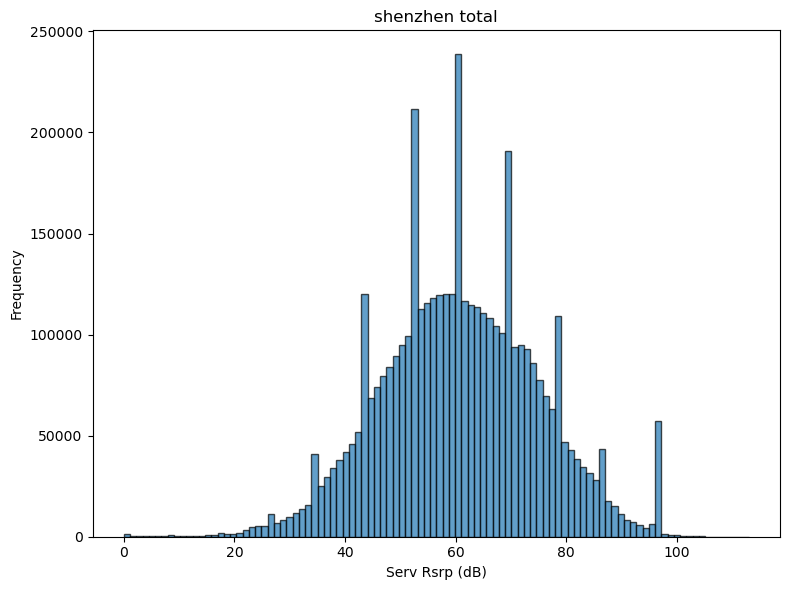

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(df['Serv'].str[2].dropna(), bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Serv Rsrp')
plt.xlabel('Serv Rsrp (dB)')
plt.ylabel('Frequency')
plt.title(fig_name)
plt.tight_layout()
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not foun

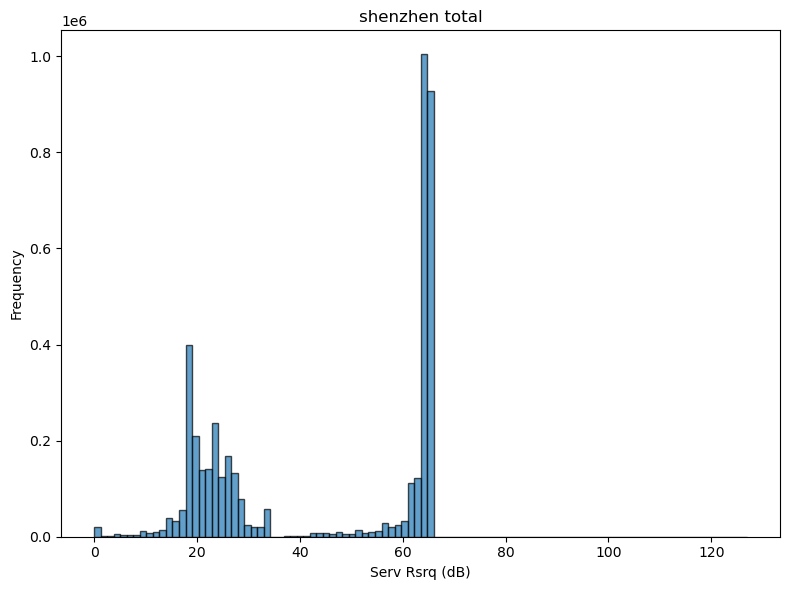

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(df['Serv'].str[3].dropna(), bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Serv Rsrq')
plt.xlabel('Serv Rsrq (dB)')
plt.ylabel('Frequency')
plt.title(fig_name)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simhei
findfont: Generic family 'sans-serif' not foun

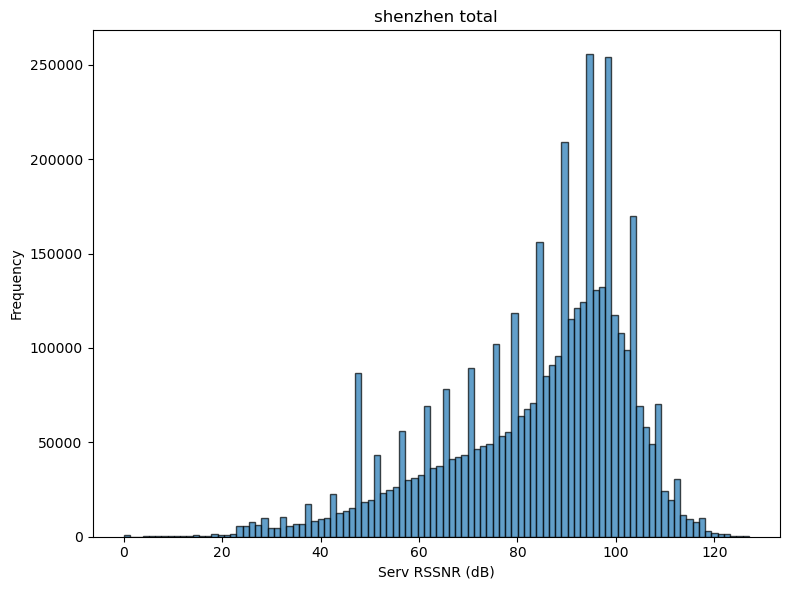

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(df['Serv'].str[4].dropna(), bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Serv RSSNR')
plt.xlabel('Serv RSSNR (dB)')
plt.ylabel('Frequency')
plt.title(fig_name)
plt.tight_layout()
plt.show()

In [52]:
df['Earfcn'] = df['Serv'].str[0]
df['pci'] = df['Serv'].str[1]
df['Rsrp'] = df['Serv'].str[2]
df['Rsrq'] = df['Serv'].str[3]
df['RSSNR'] = df['Serv'].str[4]
correlation_matrix = df[['Earfcn', 'pci', 'Rsrp', 'Rsrq', 'RSSNR']].corr()

# 提取 Serv1 与其他列的相关性
correlation_matrix['pci'].drop('pci')

Earfcn    0.628131
Rsrp      0.352877
Rsrq      0.641916
RSSNR     0.119580
Name: pci, dtype: float64

In [53]:
correlation_matrix['Rsrp'].drop('Rsrp')

Earfcn    0.466182
pci       0.352877
Rsrq      0.553981
RSSNR     0.235949
Name: Rsrp, dtype: float64

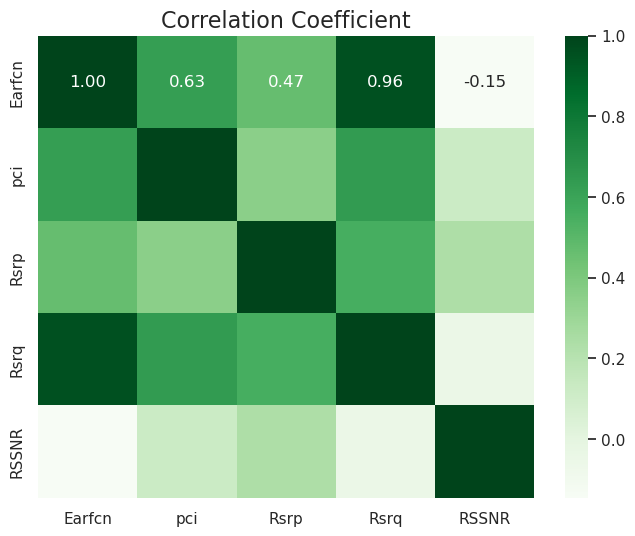

In [54]:
sns.set(style='white')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.title('Correlation Coefficient', fontsize=16)
plt.show()

In [55]:
df


,site name,traffic_type,time,Serv,Neighbor1,Neighbor2,Neighbor3,Neighbor4,Earfcn,pci,Rsrp,Rsrq,RSSNR
40,NaN,NaN,2024-04-08 18:04:18.776,"[504990, 626, 85, 65, 99]","[627264, 853, 98, 65, 104]","[627264, 967, 69, 21, 3]","[633984, 844, 62, 57, 45]","[633984, 827, 61, 58, 45]",504990,626,85,65,99
41,NaN,NaN,2024-04-08 18:04:19.177,"[504990, 626, 84, 65, 100]","[627264, 853, 98, 65, 105]","[633984, 844, 61, 59, 48]","[633984, 827, 59, 57, 43]","[633984, 823, 54, 49, 32]",504990,626,84,65,100
42,NaN,NaN,2024-04-08 18:04:19.779,"[504990, 626, 84, 65, 95]","[627264, 853, 98, 65, 105]","[633984, 844, 63, 61, 51]","[633984, 827, 60, 58, 46]","[633984, 823, 54, 47, 30]",504990,626,84,65,95
43,NaN,NaN,2024-04-08 18:04:20.181,"[504990, 626, 82, 65, 95]","[627264, 853, 98, 65, 105]","[633984, 844, 64, 61, 51]","[633984, 827, 60, 56, 43]","[633984, 843, 54, 48, 31]",504990,626,82,65,95
44,NaN,NaN,2024-04-08 18:04:20.581,"[504990, 626, 80, 65, 98]","[627264, 853, 97, 65, 104]","[627264, 967, 70, 33, 15]","[633984, 844, 64, 61, 51]","[633984, 827, 60, 56, 43]",504990,626,80,65,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433571,NaN,NaN,2024-04-03 09:44:14.930,"[504990, 626, 60, 64, 67]","[504990, 632, 51, 57, 43]","[504990, 631, 46, 39, 21]",NaN,NaN,504990,626,60,64,67
4433572,NaN,NaN,2024-04-03 09:44:15.335,"[504990, 626, 62, 64, 67]","[504990, 632, 53, 57, 43]","[504990, 631, 49, 41, 24]","[504990, 627, 44, 42, 24]",NaN,504990,626,62,64,67
4433573,NaN,NaN,2024-04-03 09:44:15.740,"[504990, 626, 62, 64, 70]","[504990, 632, 56, 57, 43]","[504990, 627, 49, 44, 27]","[504990, 631, 48, 39, 22]",NaN,504990,626,62,64,70
4433574,NaN,NaN,2024-04-03 09:44:16.152,"[504990, 626, 59, 64, 65]","[504990, 632, 56, 59, 46]","[504990, 631, 48, 44, 26]","[504990, 627, 47, 42, 24]",NaN,504990,626,59,64,65


In [56]:
df.to_csv('mid_output.csv')